In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

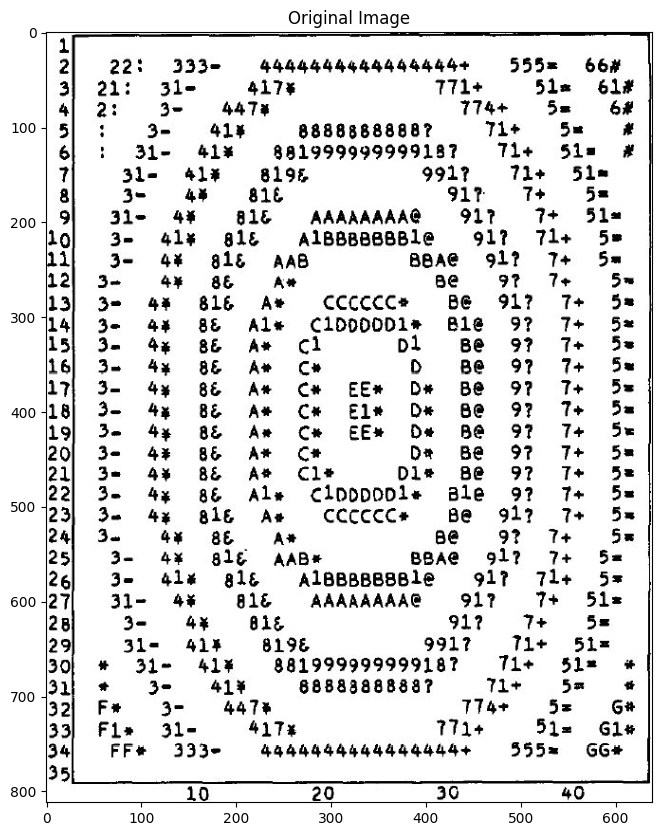

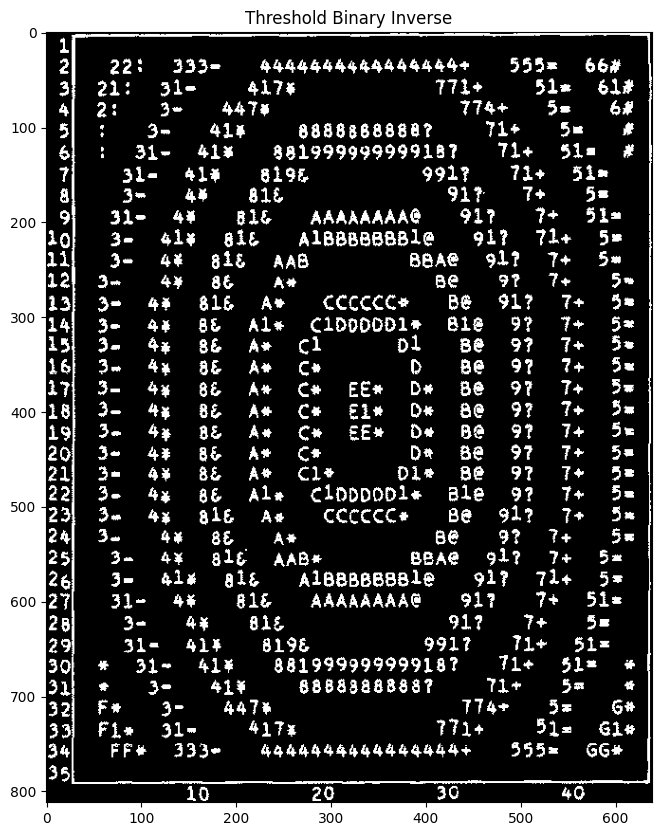

True

In [13]:
img = cv2.imread('fig1.jpg')
#convert to a gray image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray, 'gray')
plt.title("Original Image")
plt.show()

#applying the inverse binary thresholding
ret, img2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(10,10))
plt.imshow(img2, 'gray')
plt.title("Threshold Binary Inverse")
plt.show()
cv2.imwrite("thresh_binary_inv.jpg", img2)

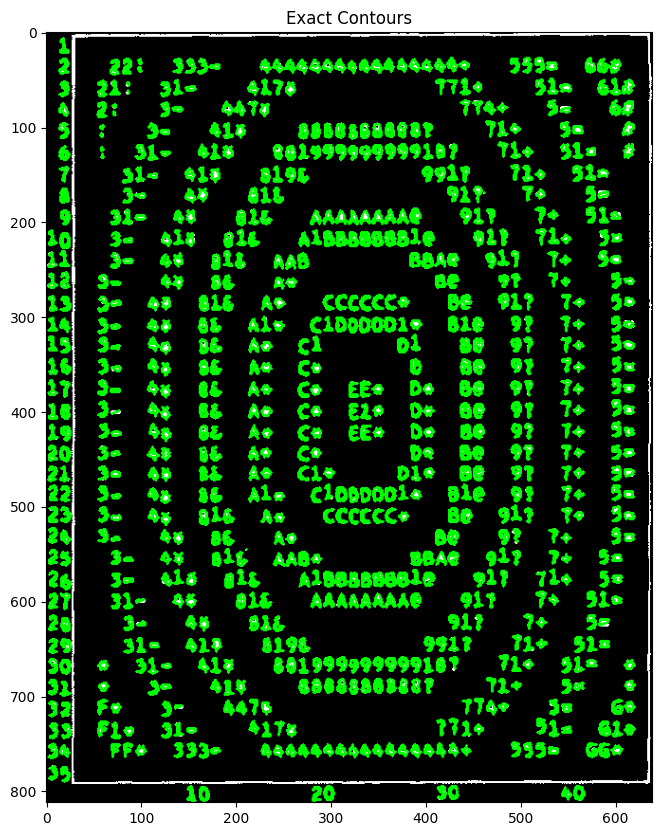

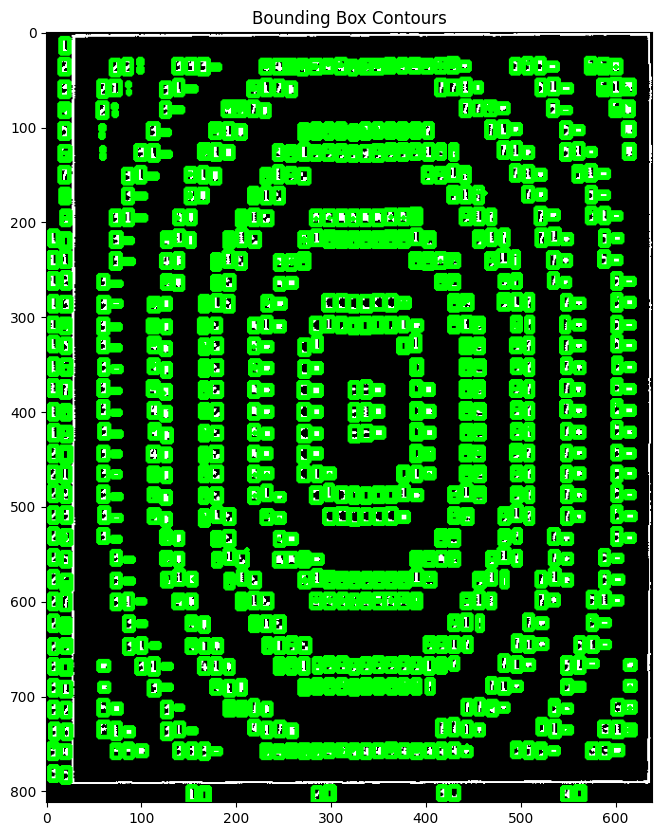

True

In [15]:
#helper method to sort a contour area list
def sortArea(val):
    return val[1]

#find the contours     
contours, hierarchy = cv2.findContours(img2.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

#initializing a list to hold contour areas
contour_areas = []

#adding an index to each contour
for index, contour in enumerate(contours):
    contour_areas.append((index, cv2.contourArea(contour)))

#sorting the list bases by the contour area     
contour_areas.sort(key=sortArea, reverse=True)

#initializing a list to hold character contour areas
char_contours = []

#removing the largest area     
for i in range(len(contours)):
    if i > 1:
        char_contours.append(contours[contour_areas[i][0]])

#display the contours
bg = cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB)
char_res = cv2.drawContours(bg, char_contours, -1, (0, 255, 0), 2)
plt.figure(figsize=(10, 10))
plt.imshow(char_res)
plt.title("Exact Contours")
plt.show()
cv2.imwrite("exact_contours.jpg", bg)

#display the bounding box of each contour
bg1 = cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB)
for cont in char_contours:
    x,y,w,h = cv2.boundingRect(cont)
    cv2.rectangle(bg1, (x,y), (x+w,y+h), (0,255,0), 3)
plt.figure(figsize=(10, 10))
plt.imshow(bg1)
plt.title("Bounding Box Contours")
plt.show()
cv2.imwrite("bouding_box_contours.jpg", bg1)